# 계층적 군집 (1)

## Hierarchical Clustering

계층적 군집 분석은 `데이터와 데이터`, `군집과 데이터`, `군집과 군집` 간의 **거리**에 대한 유사도로 군집을 형성

## 동작하는 방식

두 점 사이를 가까운 것끼리 합침. 이 과정을 반복하여 전체가 하나의 클러스터에 속할 때까지 반복

> 이 과정에 대한 시각화 결과물이 덴드로그램 형태로 나타남

어떻게 두 점 사이의  거리를 결정할지에 대한 측정 방식이 필요함

> 유클리디안 거리 측정(직선거리), 맨하탄 거리 측정 방식(블록거리)

## 군집간의 거리를 구하는 방법

### 1. Min(Single Link)

군집과 군집의 거리를 구할 때 가장 최소 거리인 것을 유사도로 측정하는 방식

![h1](res/h1.png)

### 2. Max(Complete Link)

군집과 군집의 거리를 구할 때 가장 최대 거리인 것을 유사도로 측정하는 방식

![h2](res/h2.png)

### 3. Average Link

군집과 군집의 거리를 구할 때 거리의 평균을 구해 유사도로 측정하는 방식

![h3](res/h3.png)

### 4. Centroids

군집과 군집의 거리를 구할 때 데이터의 중심점 거리를 유사도로 측정하는 방식

![h4](res/h4.png)

### 5. Ward's method

두 개의 군집이 병합되었을 때 증가하는 변동성의 양으로 유사도를 측정하는 방식

#### 변동성

두 군집의 중앙값과 두 군집에 있는 모든 데이터와의 거리의 합에서 군집간에 형성되는 거리를 뺀 값

![h5](res/h5.png)

세부 군집 알고리즘으로 Agglomerative Hierarchical Clustering(sklearn을 제공), Divisive Hierarchical Clustering 이 존재

> 참고1 : https://blog.naver.com/breezehome50/222374389827

> 참고2 : https://blog.naver.com/jaehong7719/221941329165

> 참고3 : https://datascienceschool.net/03%20machine%20learning/16.04%20%EA%B3%84%EC%B8%B5%EC%A0%81%20%EA%B5%B0%EC%A7%91%ED%99%94.html

## #01. 패키지

모델 : scipy.cluster.AgglomerativeClustering

거리계산 : scipy.cluster.hierarchy.linkage

시각화 : scipy.cluster.hierarchy.dendrogram

평가 : sklearn.metrics.silhouette_score , silhouette_samples, yellowbrick.cluster.KElbowVisualizer

In [10]:
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# sklearn은 AgglomerativeClustering() 함수를 제공
from sklearn.cluster import AgglomerativeClustering

## #02. 실습 데이터

In [4]:
# 임의의 numpy 데이터
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])
X

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 30],
       [85, 70],
       [71, 80],
       [60, 78],
       [70, 55],
       [80, 91]])

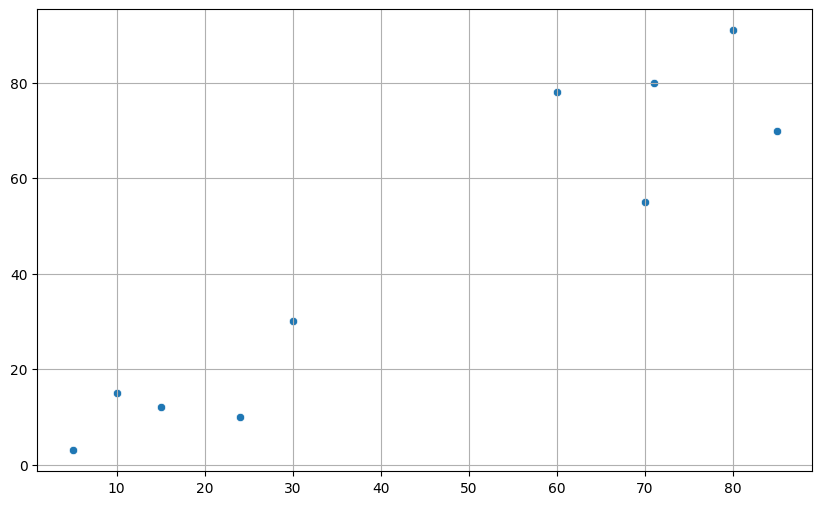

In [6]:
plt.figure(figsize=(10,6))
sb.scatterplot(x=X[:,0], y=X[:,1])
plt.grid()
plt.show()
plt.close()

## #03. 계층 군집 수행

### method 파라미터

군집간의 거리를 구하는 방법

`single`(기본 값), `complete`, `average`, `weighted`, `centroid` 중 선택

> 참고 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

### metric 파라미터

> scipy.spatial.distance.pdist 클래스의 인스턴스

- `euclidean(직선)` : metric의 기본이며 점 사이의 `직선 거리 측정`
- `cityblock` : 점 사이의 `맨하탄 거리 측정(블록 형태)`
- `seuclidean` : 표준화된 유클리디안
- `sqeuclidean` : 제곱된 유클리디안
- `cosine` : 코사인 거리 계산
- 콜백함수 지정 가능

> 참고 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy-spatial-distance-pdist

- linkage : 거리 측정 방법 지정
- 기본 값 : ward
- 그 외 값 :  ‘ward’, ‘complete’, ‘average’, ‘single’

In [7]:
lnk = linkage(X, method='single', metric="euclidean")
lnk

array([[ 1.        ,  2.        ,  5.83095189,  2.        ],
       [ 3.        , 10.        ,  9.21954446,  3.        ],
       [ 6.        ,  7.        , 11.18033989,  2.        ],
       [ 0.        , 11.        , 13.        ,  4.        ],
       [ 9.        , 12.        , 14.2126704 ,  3.        ],
       [ 5.        , 14.        , 17.20465053,  4.        ],
       [ 4.        , 13.        , 20.88061302,  5.        ],
       [ 8.        , 15.        , 21.21320344,  5.        ],
       [16.        , 17.        , 47.16990566, 10.        ]])

### 군집 결과 시각화

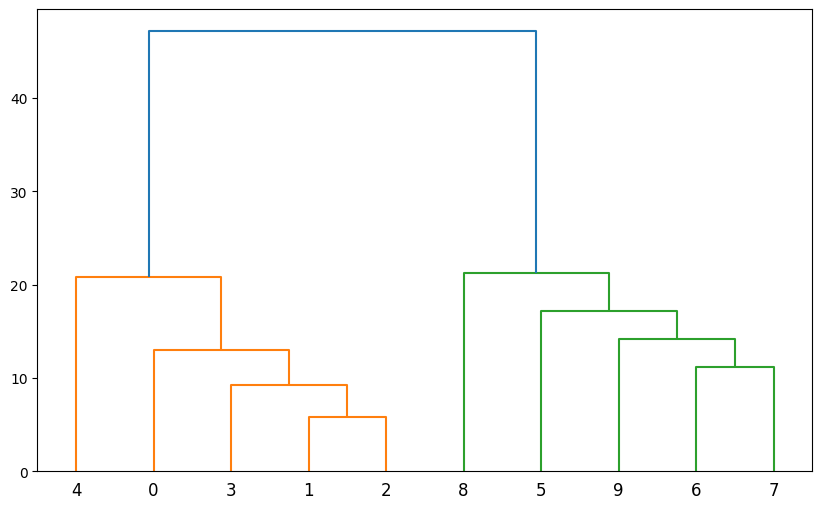

In [9]:
plt.figure(figsize=(10,6))
# scipy 패키지에서 제공
dendrogram(lnk,
           orientation='top',   #방향 : top(기본값), bottom, left, right
           labels=range(1,11), #라벨 인덱스

           # count_sort : 각 노드 n에 대해 두 하위 링크가 표시되는 순서
           # False : 아무것도 안함(기본값)
           # ascending : 클러스터 원본 개체수가 가장 적은 하위 객체가 먼저 출력
           # descending : 클러스터 원본 개체수가 가장 많은 하위 객체가 먼저 출력
           count_sort="ascending",

           # distance_sort : 각 노드 n에 대해 두 하위 링크가 표시되는 순서
           # False : 아무것도 안함(기본값)
           # ascending : 직계 자손의 사이의 거리가 최소인 하위 객체가 먼저 출력
           # descending : 직계 자손의 사이의 거리가 최대인 하위 객체가 먼저 출력
           distance_sort="ascending",
           show_leaf_counts=True, #True : 맨 아래 노드에 속한 개체 수 표시(k>1 경우만)
           )

# plt.grid()
plt.show()
plt.close()

> 여기까지는 scipy 과정

> 결과값이 나오지 않으므로 분석해야함.
2가지의 색으로 군집이 나누어지는 만큼 클러스터는 2개라고 판단

## #03. 병합군집(sklearn)

### 1. 학습 모델 구현

In [11]:
ac = AgglomerativeClustering(n_clusters=2, # 찾아야 할 클러스터 수(earlystopping과 유사)
                            # 클러스터 간 거리 측정 방법(euclidean, cityblock, manhattan, cosine)
                            # affinity 파라미터는 sklearn 1.4.0 버전부터 사용 불가
                             metric="euclidean",
                            # 'ward'(기본값), 'complete', 'average', 'single'
                             linkage="single",
                            # 노드간의 거리 계산값을 저장할지 여부(시각화를 위해서는 True를 필수 적용)
                             compute_distances=True
                             )
clustering = ac.fit(X)  #학습
clustering

AgglomerativeClustering(compute_distances=True, linkage='single',
                        metric='euclidean')

### 2. 군집 결과 확인

In [12]:
labels = clustering.labels_
labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

### 3. 노드간의 거리 확인

학습 모델 객체 생성 과정에서 반드시 `compute_distances=True`로 설정돼야만 한다.

### 4. 군집결과 시각화

In [15]:
# 각 노드의 자식 정보
clustering.children_

array([[ 1,  2],
       [10,  3],
       [ 6,  7],
       [ 0, 11],
       [12,  9],
       [ 5, 14],
       [13,  4],
       [ 8, 15],
       [16, 17]])

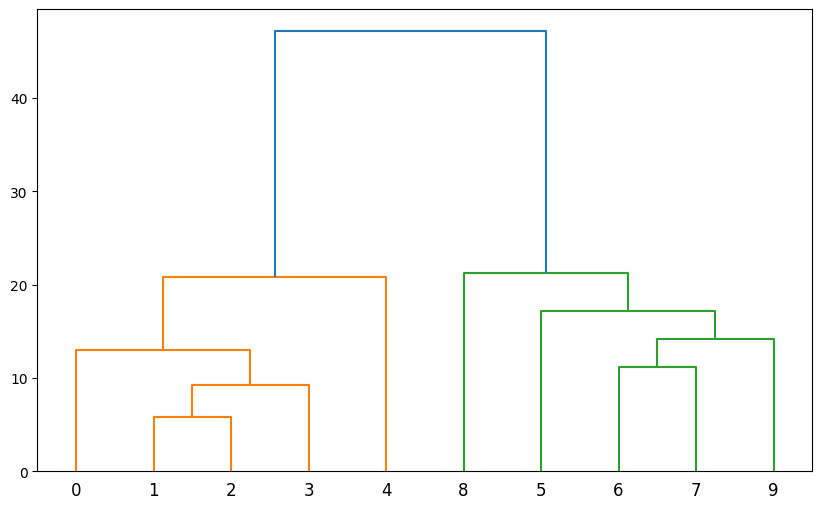

In [22]:
# scipy는 아래의 과정을 자동으로 수행, sklearn은 수동으로 설정(공식으로 판단할 것)

counts = np.zeros(clustering.children_.shape[0])    #zeros 모든 원소가 0인 요소
n_samples = len(clustering.labels_)
# labels_ : 각 입력 데이터의 그룹 번호

# 자식 노드를 반복하면서 점을 찍어준다(자식이 몇개 있는지 확인하는 과정)
for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# 자식 노드의 수를 저장하는 배열
linkage_matrix = np.column_stack(
    [clustering.children_, clustering.distances_, counts]
).astype(float)

# plt를 설정하지 않으면 쓸데 없는 값도 함께 추출됨
# dendrogram(linkage_matrix)

plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.show()
plt.close()